In [ ]:
#1_IMPORTO LIBRERIAS
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
#2_UNO LOS 4 ARCHIVOS QUE CONTIENEN INFORMACIÓN DE ALTAS HOSPITALARIAS CON DIAGNOSTICO EPOC AÑOS 2022, 2023, 2024 Y 2025
import pandas as pd

# URLs of the files
url='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_EPOC_2022.csv'
url1='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_EPOC_2023.csv'
url2='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_EPOC_2024.csv'
url3='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_EPOC_2025.csv'

urls = [url, url1, url2, url3]

# Read and concatenate the CSV files from the URLs
df = pd.concat((pd.read_csv(url, encoding='latin-1', delimiter=';') for url in urls), ignore_index=True)

# Display the first few rows of the combined dataframe
display(df.head())
display(df.info())

,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo
0,01/01/2022 00:18:00,10/01/2022 18:20:00,Sábado,Lunes,Z.B.S. Ciudad Rodrigo,Urbano,C.A.U. Salamanca,Salamanca,Salamanca,87,Mujer
1,01/01/2022 02:09:00,24/01/2022 15:10:00,Sábado,Lunes,Z.B.S. Ávila Estación,Urbano,C.A. Ávila,Ávila,Ávila,77,Hombre
2,01/01/2022 02:35:00,07/01/2022 18:01:00,Sábado,Viernes,Z.B.S. Cistierna,Rural,C.A.U. León,León,León,63,Hombre
3,01/01/2022 09:40:00,11/01/2022 09:07:00,Sábado,Martes,Z.B.S. Alamedilla,Urbano,C.A.U. Salamanca,Salamanca,Salamanca,69,Hombre
4,01/01/2022 13:01:00,07/01/2022 15:29:00,Sábado,Viernes,Z.B.S. Plaza del Ejército,Urbano,H.U. Río Hortega,Valladolid Oeste,Valladolid,72,Hombre


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20795 entries, 0 to 20794
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fecha de ingreso                          20795 non-null  object
 1   Fecha de alta                             20795 non-null  object
 2   Día de la semana en la fecha del ingreso  20795 non-null  object
 3   Día de la semana en la fecha del alta     20795 non-null  object
 4   Zona Básica de Salud del Paciente         20789 non-null  object
 5   Ámbito de procedencia                     20789 non-null  object
 6   Hospital                                  20795 non-null  object
 7   Área                                      20795 non-null  object
 8   Provincia                                 20795 non-null  object
 9   Edad                                      20795 non-null  int64 
 10  Sexo                                      2079

None

In [ ]:
# 3_CONVIERTO FECHAS EN DATATIME
df['Fecha de ingreso'] = pd.to_datetime(df['Fecha de ingreso'], format='%d/%m/%Y %H:%M:%S')
df['Fecha de alta'] = pd.to_datetime(df['Fecha de alta'], format='%d/%m/%Y %H:%M:%S')

In [ ]:
# GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
df.to_csv('5_altas_hospitalarias_con_diagnostico_de_EPOC.csv', index=False)

In [ ]:
# 4_AGREGO UNA COLUMNA 'FECHA HOSPITALIZADO' QUE CONTIENE LA FECHA EN QUE UNA PERSONA ESTA INTERNADA Y AGREGRO UNA FILA POR CADA DÍA QUE LA PERSONA ESTA HOSPITALIZADA PARA PODER FINALMENTE TENER LA INFORMACIÓN DE INTERNACIÓN
# POR DIA POR HOSPITAL

expanded_rows = []

for _, row in df.iterrows():
    ingreso = row['Fecha de ingreso']
    alta = row['Fecha de alta']
    current_date = ingreso.date()
    while current_date <= alta.date():
        new_row = row.copy()
        new_row['fecha_hosp_epoc'] = current_date
        expanded_rows.append(new_row)
        current_date += timedelta(days=1)

# Crear nuevo DataFrame expandido
expanded_df = pd.DataFrame(expanded_rows)

In [ ]:
# 5_ESTA NUEVA COLUMNA 'FECHA HOSPITALIZADO' LA CONVIERTO EN OBJETO DATATIME
expanded_df['fecha_hosp_epoc'] = pd.to_datetime(expanded_df['fecha_hosp_epoc'])



In [ ]:
# 6_PARA CHEQUEAR INFO NUEVA
display(expanded_df.head())
display(expanded_df.tail())
display(expanded_df.info())

,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,fecha_hosp_epoc
0,2022-01-01 00:18:00,2022-01-10 18:20:00,Sábado,Lunes,Z.B.S. Ciudad Rodrigo,Urbano,C.A.U. Salamanca,Salamanca,Salamanca,87,Mujer,2022-01-01
0,2022-01-01 00:18:00,2022-01-10 18:20:00,Sábado,Lunes,Z.B.S. Ciudad Rodrigo,Urbano,C.A.U. Salamanca,Salamanca,Salamanca,87,Mujer,2022-01-02
0,2022-01-01 00:18:00,2022-01-10 18:20:00,Sábado,Lunes,Z.B.S. Ciudad Rodrigo,Urbano,C.A.U. Salamanca,Salamanca,Salamanca,87,Mujer,2022-01-03
0,2022-01-01 00:18:00,2022-01-10 18:20:00,Sábado,Lunes,Z.B.S. Ciudad Rodrigo,Urbano,C.A.U. Salamanca,Salamanca,Salamanca,87,Mujer,2022-01-04
0,2022-01-01 00:18:00,2022-01-10 18:20:00,Sábado,Lunes,Z.B.S. Ciudad Rodrigo,Urbano,C.A.U. Salamanca,Salamanca,Salamanca,87,Mujer,2022-01-05


,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,fecha_hosp_epoc
20794,2024-12-31 22:39:00,2025-01-09 15:29:00,Martes,Jueves,Z.B.S. Segovia II,Urbano,C.A. Segovia,Segovia,Segovia,82,Hombre,2025-01-05
20794,2024-12-31 22:39:00,2025-01-09 15:29:00,Martes,Jueves,Z.B.S. Segovia II,Urbano,C.A. Segovia,Segovia,Segovia,82,Hombre,2025-01-06
20794,2024-12-31 22:39:00,2025-01-09 15:29:00,Martes,Jueves,Z.B.S. Segovia II,Urbano,C.A. Segovia,Segovia,Segovia,82,Hombre,2025-01-07
20794,2024-12-31 22:39:00,2025-01-09 15:29:00,Martes,Jueves,Z.B.S. Segovia II,Urbano,C.A. Segovia,Segovia,Segovia,82,Hombre,2025-01-08
20794,2024-12-31 22:39:00,2025-01-09 15:29:00,Martes,Jueves,Z.B.S. Segovia II,Urbano,C.A. Segovia,Segovia,Segovia,82,Hombre,2025-01-09


<class 'pandas.core.frame.DataFrame'>
Index: 189525 entries, 0 to 20794
Data columns (total 12 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Fecha de ingreso                          189525 non-null  datetime64[ns]
 1   Fecha de alta                             189525 non-null  datetime64[ns]
 2   Día de la semana en la fecha del ingreso  189525 non-null  object        
 3   Día de la semana en la fecha del alta     189525 non-null  object        
 4   Zona Básica de Salud del Paciente         189485 non-null  object        
 5   Ámbito de procedencia                     189485 non-null  object        
 6   Hospital                                  189525 non-null  object        
 7   Área                                      189525 non-null  object        
 8   Provincia                                 189525 non-null  object        
 9   Edad                 

None

In [ ]:
#7 TOTAL DE PACIENTES HOSPITALIZADOS POR DÍA POR HOSPITAL
Ocupación_total_diaria = expanded_df.groupby(['fecha_hosp_epoc', 'Hospital']).size().reset_index(name='Occupancy')

Ocupación_total_diaria.head()

,fecha_hosp_epoc,Hospital,Occupancy
0,2021-10-21,H.C.U. Valladolid,1
1,2021-10-22,H.C.U. Valladolid,1
2,2021-10-23,H.C.U. Valladolid,1
3,2021-10-24,H.C.U. Valladolid,1
4,2021-10-25,H.C.U. Valladolid,1


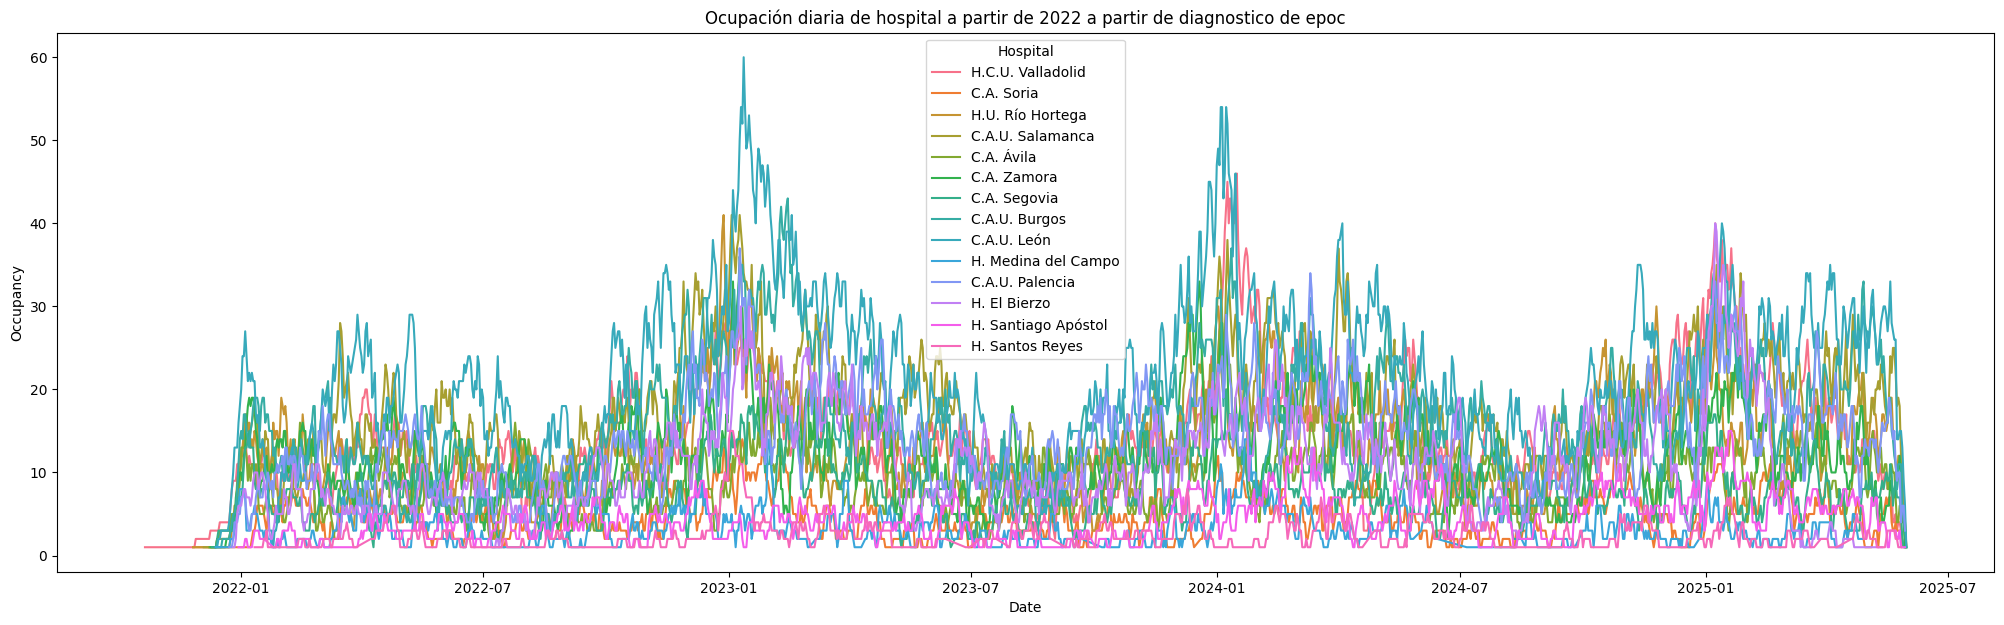

In [ ]:
#7_VER LOS REULTADOS GRAFICADOS POR DÍA POR HOSPITAL

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
sns.lineplot(data=Ocupación_total_diaria, x='fecha_hosp_epoc', y='Occupancy', hue='Hospital')
plt.title('Ocupación diaria de hospital a partir de 2022 a partir de diagnostico de epoc')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.show()

In [ ]:
#8 GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
Ocupación_total_diaria.to_csv('5_Ocupación_total_diaria_hosp_epoc.csv', index=False)
